# 일급함수와 고차함수

In [ ]:
licat = print
licat('hello world')

hello world


In [ ]:
class Cat:
    def sound(self):
        print('냐옹')

licat = Cat()
licat_sound = licat.sound
licat_sound()

냐옹


In [ ]:
l = [10, 20, 30]
la = l.append
la(40)
l

[10, 20, 30, 40]

In [ ]:
def add(x, y):
    return x + y

def subtract(x, y):
    return x - y

funcs = [add, subtract]
print(funcs[0](2, 3))  # 출력: 5

5


In [ ]:
class Operator:
    def add(self, x, y):
        return x + y

    def sub(self, x, y):
        return x - y

    def mul(self, x, y):
        return x * y

    def div(self, x, y):
        return x / y

    def _and(self, x, y):
        pass

    def _or(self, x, y):
        pass

op = Operator()
logical_op = {
    'add': op.add,
    'sub': op.sub,
    'mul': op.mul,
    'div': op.div,
}
arithmetic_op = {
    '_and': op._and,
    '_or': op._or,
}


print(logical_op['add'](2, 3))  # 출력: 5
print(op.add(2, 3))

for _, f in logical_op.items():
    print(f(2, 3))  #   4칙연산 모두 계산


5
5
5
-1
6
0.6666666666666666


In [ ]:
# JavaScript
# l = [10, 20, 30]
# l.map((v)=>v**2) // [100, 400, 900]

In [ ]:
def licat_sound(p):
    # 함수의 기능 10줄이 들어간다 생각하겠습니다.
    x = 10
    y = 10
    z = 10
    p('냐옹')


licat_sound(print)  # licat_sound안에 built-in function인 print를 넣었습니다

냐옹


In [ ]:
def square(x):
    return x ** 2

def width_circle(r, s):
    return s(r) * 3.14

width_circle(10, square)

314.0

In [ ]:
def create_exponent(x):
    def exponent(y):
        return y ** x
    return exponent

exponent_2 = create_exponent(2) #   exponent
exponent_3 = create_exponent(3) #   exponent
print(exponent_2(10))   #   출력 100
# print(exponent(10)) => return y ** 2(이 숫자는 상수취급되어 변경시킬 수 없게 됩니다.)
print(exponent_3(10))   #   출력 1000
# print(exponent(10)) => return y ** 3(이 숫자는 상수취급되어 변경시킬 수 없게 됩니다.)

100
1000


In [ ]:
def f():
    l = [10 ,20, 30]
    print(id(l))
    return l

sample = f()
id(sample)  # 주소가 같다
# 함수가 끝나면 안에 변수들이 다 휘발되는 것 아니었나요??
# sample이 return값으로 []안의 주소를 가리키게 되었으므로(참조)

132979837451328


132979837451328

In [ ]:
def ff():
    l = [10 ,20, 30]
    return l

sample_ = ff()

In [ ]:
import sys

sys.getrefcount(sample_) # window, mac, linux의 출력값이 다르다.
# 중요 포인트는 getrefcount의 작동 원리가 아니라
# 함수가 종료되어도 참조하는 변수가 있다면
# 값이 사라지지 않는다는 것이 포인트입니다!

2

In [ ]:
# 일급 함수: 함수를 일급객체(값, 주소)로 취급
# 고차 함수: 함수를 아규먼트로 받거나 return 값으로 반환할 수 있는 함수

# 클로저

In [ ]:
# 클로저: 휘발되었어야 하는 메모리 영역에 접근하여 함수나 데이터를 활용하는 일

In [ ]:
# 고차함수이며, 일반적인 클로저의 형태는 아닙니다.
# 보통 클로저는 outer_function(함수)에 은닉할 값을 매개변수로 넘겨줍니다.
def outer_function():
    def inner_function():
        return 100+100
    return inner_function

# 클로저인 경우
def outer_function(x):
    def inner_function(y):
        return x + y
    return inner_function

inner = outer_function(100)
'''
def inner(y):
    return 100 + y
inner(200)
'''
inner(200) # inner 입장에서 100을 변경할 수 있는 방법이 없습니다.

300

# 데코레이터

In [ ]:
# 이런 식으로 우린 사용합니다.
# login한 사용자만 게시판 읽도록
# 그러면 내가 login을 구현해야 하나?
# Django와 같은 프레임웤은 필요한 데코레이터는 미리 구현되어 있습니다.
# 걱정하지 않으셔도 됩니다.
def login(arg):
    pass

@login
def 게시판읽기():
    pass

In [ ]:
def simple_decorator(function):
    def wrapper():
        print("Before the function call")
        function()
        print("After the function call")
    return wrapper

@simple_decorator   # 이렇게 하면 hello를 simple_decorator에 아규먼트로 넣어주고 실행하겠다.
def hello():
    print("Hello, World!")

hello() # 데코레이터가 없는 상태에서는 simple_decorator(hello)() 와 같습니다.

Before the function call
Hello, World!
After the function call


In [ ]:
def simple_decorator(function):
    def wrapper():
        print("Before the function call")
        function()
        print("After the function call")
    return wrapper


def hello():
    print("Hello, World!")

simple_decorator(hello)() # simple_decorator(hello)() => wrapper()
                          # simple_decorator(hello) => wrapper

Before the function call
Hello, World!
After the function call


In [ ]:
# step 1
def data_Preprocessing(function):
    def wrapper():
        pass
    return wrapper

@data_Preprocessing
def mean(data):
    return sum(data)/len(data)

mean([1, 2, '3', 4, '5']) # TypeError 발생

In [ ]:
# step 2
def data_Preprocessing(function):
    def wrapper(data):
        print(data)
    return wrapper

@data_Preprocessing
def mean(data):
    return sum(data)/len(data)

mean([1, 2, '3', 4, '5']) # 데이터만 출력하고 함수는 None을 반환

[1, 2, '3', 4, '5']


In [ ]:
# step 3
def data_Preprocessing(function):
    def wrapper(data):
        return function(list(map(int, data)))
    return wrapper

@data_Preprocessing
def mean(data):
    return sum(data)/len(data)

mean([1, 2, '3', 4, '5']) # 출력: 3.0 (정상 작동)   #   데코레이터가 붙으면 mean을 실행하는 것이 아닙니다!

# data_Preprocessing(mean) => wrapper
# data_Preprocessing(mean)([1, 2, '3', 4, '5']) => wrapper([1, 2, '3', 4, '5'])

3.0

종훈님
mean([1, 2, 3, 4, 5])이 실행되면,
data_Preprocessing(mean 함수 주소) 실행> wrapper 함수 주소 반환?>
wrapper([1, 2, 3, 4, 5]) 실행 > 만약 wrapper 안에 function이 있다면 data_Preprocessing의 아규먼트로 받은 함수 주소의 함수를 사용(여기선 mean 함수)

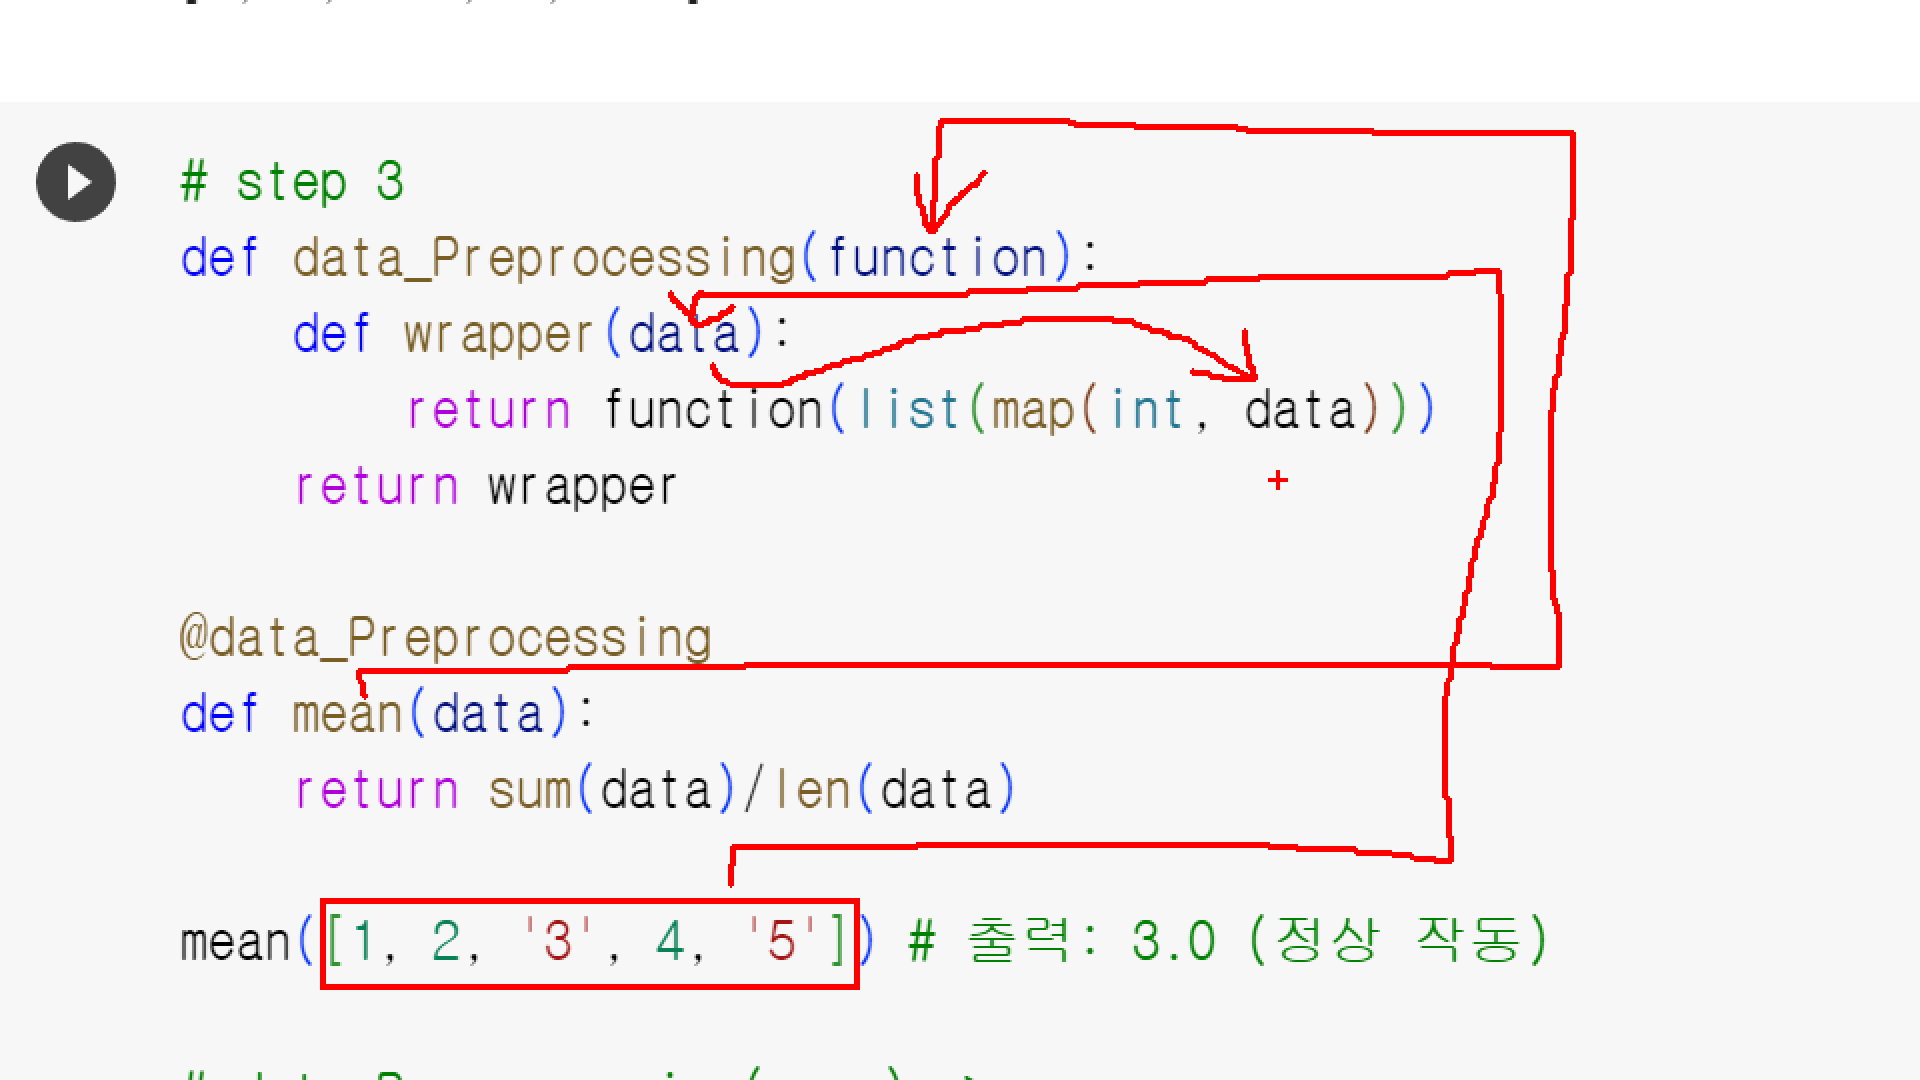

In [ ]:
# step 3
def data_Preprocessing(function):
    def wrapper(a, b, c):
        print(a, b, c)
        # print(function([a, b, c]))
    return wrapper

@data_Preprocessing
def mean(data):
    return sum(data)/len(data)

mean(10, 20, 30) # 왜 오류가 없을까요? data인자가 하나고, 10, 20, 30인자가 3개인데요?
# 인자가 들어간 메서드는 wrapper
# 데코레이터가 mean을 실행안시킨다

10 20 30


In [ ]:
#### 여기까지 이해하시면 됩니다. ####

In [ ]:
# 강성웅님 Q&A
def outer(function):
    def wrapper():
        return 'hello'
    return wrapper

@outer
def a(data):
    def b():
        print('hello b')
    return b

print(a())

hello


In [ ]:
# 강성웅님 Q&A
# b를 실행시키고 싶은데 어떻게 해야 할까요?
def outer(function):
    def wrapper():
        function()
        return 'hello'
    return wrapper

@outer
def a():
    def b():
        print('hello b')
    return b

print(a())

hello


In [ ]:
# 강성웅님 Q&A
# b를 실행시키는 법
def outer(function):
    def wrapper():
        function()()
        return 'hello'
    return wrapper

@outer
def a():
    def b():
        print('hello b')
    return b

print(a())

hello b
hello


In [ ]:
def add_exclamation(function):
    def wrapper(text):
        print(f'add_exclamation 데코레이터 시작')
        result = function(text) + "!"
        print(f'add_exclamation 데코레이터 종료')
        return result
    return wrapper

def add_question_mark(function):
    def wrapper(text):
        print(f'add_question_mark 데코레이터 시작')
        result = function(text) + "?"
        print(f'add_question_mark 데코레이터 종료')
        return result
    return wrapper

def add_dot(function):
    def wrapper(text):
        print(f'add_dot 데코레이터 시작')
        result = function(text) + "."
        print(f'add_dot 데코레이터 종료')
        return result
    return wrapper

@add_exclamation
@add_question_mark
@add_dot
def greet(message):
    print('함수실행!')
    return message

result = greet("Hello")
print(result)  # 출력: "Hello.!?"

add_exclamation 데코레이터 시작
add_question_mark 데코레이터 시작
add_dot 데코레이터 시작
함수실행!
add_dot 데코레이터 종료
add_question_mark 데코레이터 종료
add_exclamation 데코레이터 종료
Hello.?!


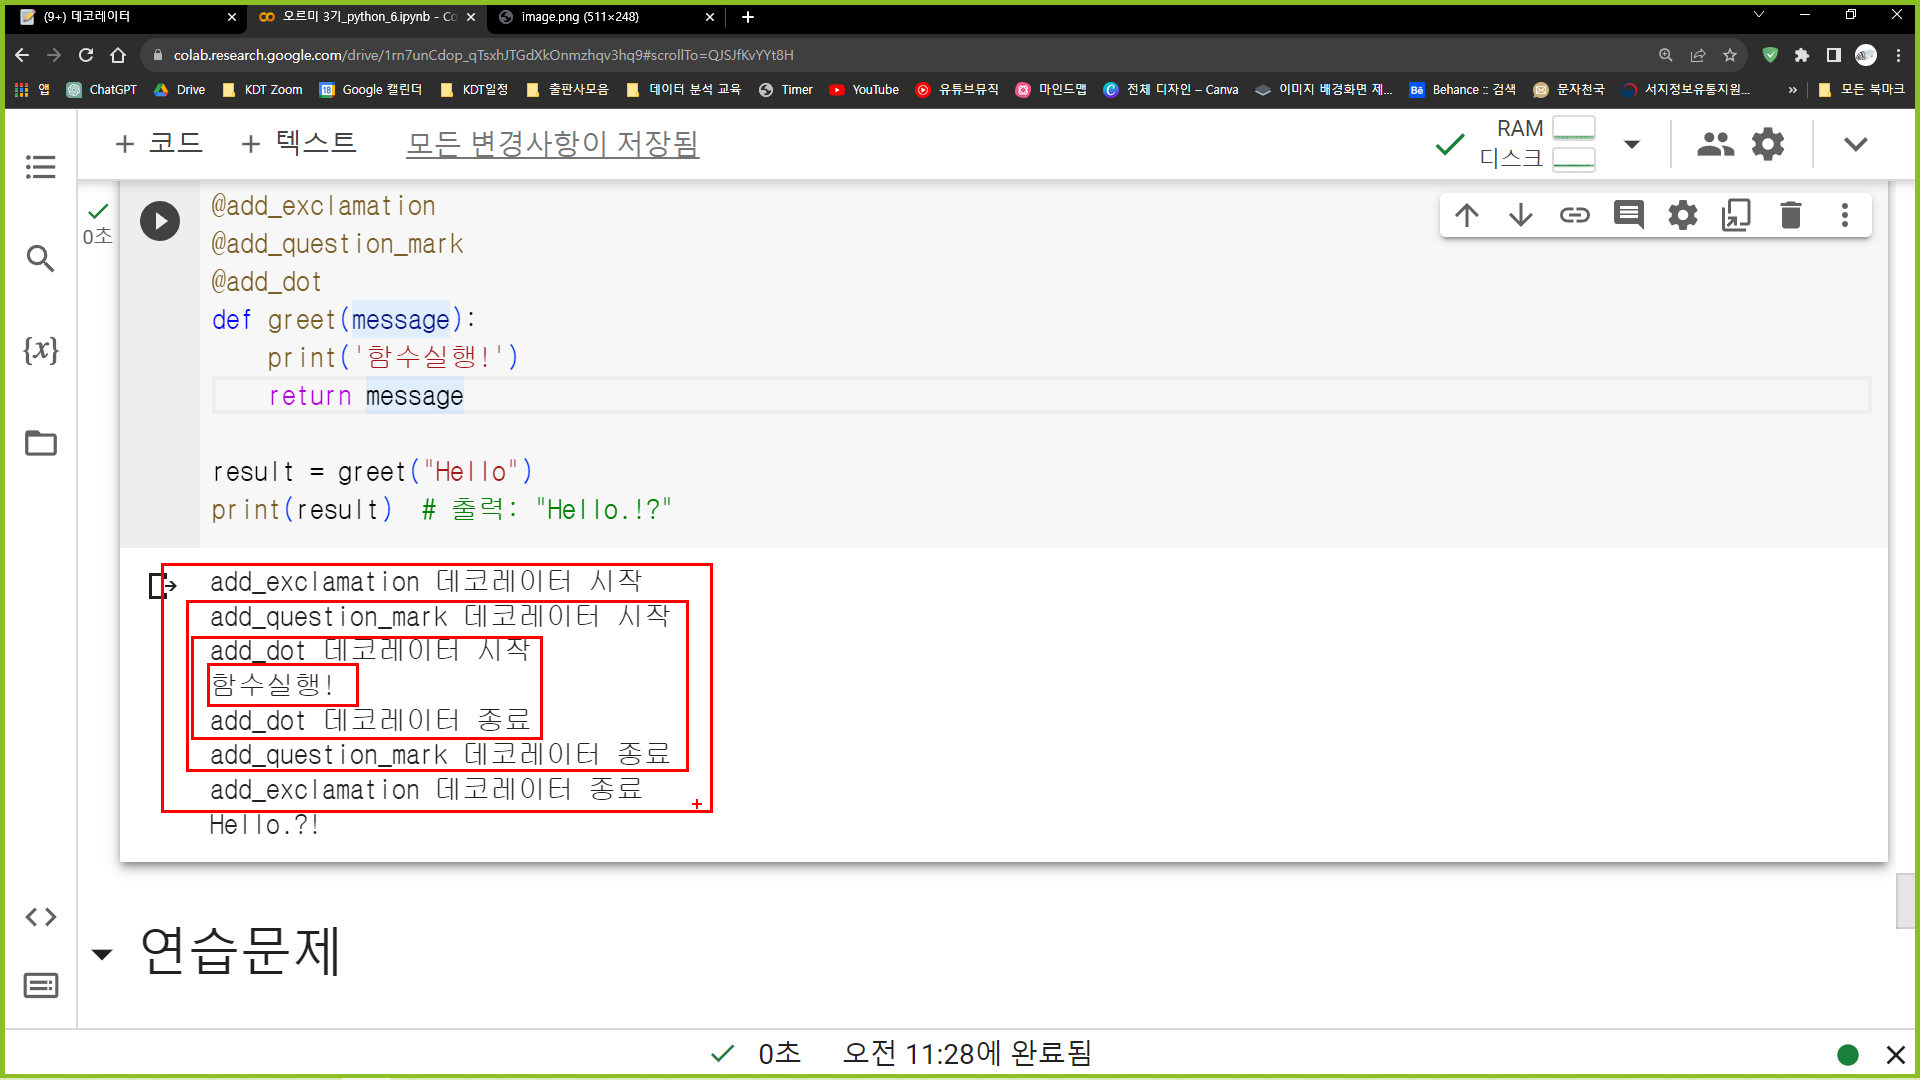

In [ ]:
def add(n): # 데코렝이터를 감싸는 하나의 함수를 더 만들어서 아규먼트를 받는 방법입니다.
    def decorator(function):
        def new_function(a, b):
            print(f'plus 함수가 {n}만큼 증가시키는 데코레이터가 시작됩니다.')
            result = function(a, b)
            print(f'plus 함수가 {n}만큼 증가시키는 데코레이터가 종료됩니다.')
            return result + n
        return new_function
    return decorator

@add(1000)
def plus(a, b):
    print('plus 함수가 호출되었습니다.')
    return a + b

result = plus(10, 20)
print(f'result : {result}')

plus 함수가 1000만큼 증가시키는 데코레이터가 시작됩니다.
plus 함수가 호출되었습니다.
plus 함수가 1000만큼 증가시키는 데코레이터가 종료됩니다.
result : 1030


In [ ]:
def add(n):
    def decorator(function):    # 여기서부터의 기능은 같습니다.
        def wrapper(a, b):
            print(f'plus 함수가 {n}만큼 증가시키는 데코레이터가 시작됩니다.')
            result = function(a, b)
            print(result)
            print(f'plus 함수가 {n}만큼 증가시키는 데코레이터가 종료됩니다.')
            return result + n
        return wrapper
    return decorator

@add(1000)
def plus(a, b):
    print('plus 함수가 호출되었습니다.')
    return a + b

result = plus(10, 20) # == add(n)(plus)(10,20)
print(f'result : {result}')

# add(n)(plus)(10,20), add(1000) == decorator
# decorator(plus)(10,20), decorator(plus) == wrapper
# wrapper(10, 20)

# decorator(plus(10, 20))() (X)
# add(1000)(plus)(10, 20)

plus 함수가 1000만큼 증가시키는 데코레이터가 시작됩니다.
plus 함수가 호출되었습니다.
30
plus 함수가 1000만큼 증가시키는 데코레이터가 종료됩니다.
result : 1030


# 연습문제


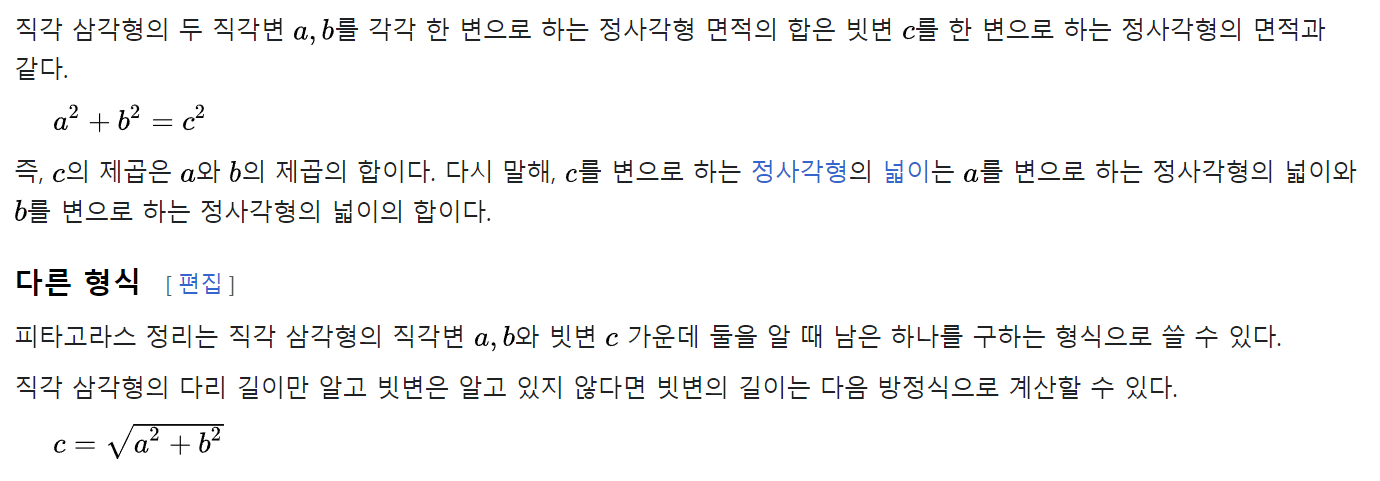

In [ ]:
def s(x):
    return x * x

def r(x):
    return x**(1/2)

def length(a, b, c, square , root):
    return print(a ** 2 + b ** 2 == square(c), c == root(square(a) + square(b)))


length(3, 4, 5, s, r)

True True


In [ ]:
def s(x):
    return x * x

def r(x):
    return x**(1/2)

def length(a, b, c, square , root):
    return print(square(a) + square(b) == square(c), c == root(square(a) + square(b)))


length(3, 4, 5, s, r)

True True


In [ ]:
def find_hypotenuse(a, b, s, r):
    return r(s(a) + s(b))

def square(value):
    return value ** 2

def root(value):
    return value ** 0.5

find_hypotenuse(6, 8, square, root)

10.0

# lambda

In [ ]:
square = lambda x: x*x
print(square(5))  # 출력: 25

25


In [ ]:
# 재사용되는 코드이므로 lambda가 아닌 함수로 정의해야한다
def 제곱(x):
    return x ** 2

list(map(제곱, [1, 2, 3])) + list(map(제곱, [4, 5, 6]))

[1, 4, 9, 16, 25, 36]

In [ ]:
# 재사용되지 않는 코드

list(map(lambda x: x**2, [1, 2, 3]))

[1, 4, 9]

In [ ]:
# 이런 형태는 오늘 보고 끝입니다
result = lambda x: x ** 2
print(result(3))

result = (lambda x: x ** 2)(3)
print(result)   #  출력 9

9
9


# args, kargs

In [ ]:
a, b, *c = 10, 20, 30, 40, 50
a, b , c

(10, 20, [30, 40, 50])

In [ ]:
def print_args(a, b, *args):    # args뒤에 일반 변수를 선언하지 못합니다
    print(args)
    for x in args:
        print(x)

print_args(100, True, 'Licat', 'hello', 10)

('Licat', 'hello', 10)
Licat
hello
10


In [ ]:
def print_args(a, b, *args, c):    # args뒤에 일반 변수를 선언하지 못합니다
    print(args)
    for x in args:
        print(x)

print_args(100, True, 'Licat', 'hello', 10)

In [ ]:
def print_args(a, b, *args, *c):    # args뒤에 또 다른 가변 아규먼트를 넣지 못합니다
    print(args)
    for x in args:
        print(x)

print_args(100, True, 'Licat', 'hello', 10)

In [ ]:
def print_kwargs(a, **kwargs):
    print(a)
    print(kwargs)
    for i in kwargs:
        print(i)

print_kwargs(100, name='Licat', age='10')

100
{'name': 'Licat', 'age': '10'}
name
age


In [ ]:
# kwargs는 *이 하나가 아닌 **두개를 사용해야합니다
# * 하나는 args로 쓰고 키값만 가져오고 밸류값은 가져오지못한다
def print_kwargs(*kwargs):
    print(kwargs)
    for i in kwargs:
        print(i)

value = {'one':10, 'two':20}
print_kwargs(*value)

('one', 'two')
one
two


In [ ]:
def print_kwargs(*args):
    print(args)
    for i in args:
        print(i)

value = {'one':10, 'two':20}
print_kwargs(*value)

('one', 'two')
one
two


In [ ]:
def func(a, b, *, c, d):
    print(a, b, c, d)

# func(1, 2, c = 3, d = 4)  # 올바른 예시
# func(1, 2, 3, d = 4)  # 잘못된 예시
# func(1, 2, 3, 4)    # 잘못된 예시

In [ ]:
def func(a, b, c):
    print(a, b, c)

args = (1, 2, 3)
func(*args)
print(args, *args)

kwargs = {'a': 1, 'b': 2, 'c': 3}
func(**kwargs)
print(kwargs, **kwargs) # error

1 2 3
(1, 2, 3) 1 2 3
1 2 3
{'a': 1, 'b': 2, 'c': 3}


In [ ]:
kwargs = {'a': 1, 'b': 2, 'c': 3}
print(kwargs, *kwargs)
# print(kwargs, **kwargs) == print(kwargs, a=1,b=2,c=3)

{'a': 1, 'b': 2, 'c': 3} a b c


In [ ]:
def func(d=100, c=200, b=300, a=400):
    print(d, c, b, a)

kwargs = {'a': 1, 'b': 2, 'c': 3}

func(**kwargs)
# func(kwargs, a=1, b=2, c=3)로 입력이 되었다는 것을 확인할 수 있습니다.

100 3 2 1


In [ ]:
def func(a=100, **kwargs):
    print(a, kargs)


func(1000, i=1, j=2, k=3)

In [ ]:
def func(*args):
    print(args)



func(10, 20, 30)
# (10, 20, 30) => *args => 10, 20, 30

(10, 20, 30)


In [ ]:
def func(a, b, c):
    print(a, b, c)


args = (10, 20, 30)
func(*args)
# (10, 20, 30) => *args => 10, 20, 30

병헌님

*args는 리스트를 묶고 풀고하는 용도로 사용하고
**kargs는 딕셔너리를 묶고 풀고하는 용도로 사용한다고 간단하게 생각

In [ ]:
a, b, c =range(3)
a, b, c

(0, 1, 2)

In [ ]:
a, b, c = range(10, 31, 10)
a, b, c

(10, 20, 30)

# 이터레이터

In [ ]:
class MyIterator:
    def __init__(self, stop):
        self.current_value = 0  # 현재 값
        self.stop = stop  # 순회를 멈출 값

    def __iter__(self):
        return self

    def __next__(self):
        if self.current_value >= self.stop:
            raise StopIteration
        result = self.current_value
        self.current_value += 1
        return result

my_iterator = MyIterator(5)

for i in my_iterator:
    print(i)

'''
for를 만나면 __iter__가 실행이 되고, 반복이 시작되면 __next__를 호출합니다.
'''

0
1
2
3
4


'\nfor를 만나면 __iter__가 실행이 되고, 반복이 시작되면 __next__를 호출합니다.\n'

In [ ]:
# for 문을 한번더 하고싶으면
class MyIterator:
    def __init__(self, stop):

        self.stop = stop  # 순회를 멈출 값

    def __iter__(self):
        self.current_value = 0  # 현재 값
        return self

    def __next__(self):
        if self.current_value >= self.stop:
            raise StopIteration
        result = self.current_value
        self.current_value += 1
        return result

my_iterator = MyIterator(5)

for i in my_iterator:
    print(i)

for i in my_iterator:
    print(i)

0
1
2
3
4
0
1
2
3
4


In [ ]:
class MyIterator:
    def __init__(self, stop):

        self.stop = stop  # 순회를 멈출 값

    def __iter__(self):
        self.current_value = 0  # 현재 값
        return self

    def __next__(self):
        if self.current_value >= self.stop:
            raise StopIteration
        result = self.current_value
        self.current_value += 1
        return result

my_iterator = MyIterator(5)

i = iter(my_iterator)   #   여기서부터
print(next(i))
print(next(i))
print(next(i))
print(next(i))
print(next(i))
print(next(i))  # 여기까지가 for에 작동 원리 입니다.

0
1
2
3
4


StopIteration: ignored

# 제너레이터

In [ ]:
def my_generator(data):
    for i in data:
        yield i

my_list = [1, 2, 3, 4, 5]
my_iterator = my_generator(my_list)

for i in my_iterator:
    print(i)

1
2
3
4
5


In [ ]:
def my_generator(data):
    for i in data:
        yield i * 10

for i in my_generator([1, 2, 3]):
    print(i)

10
20
30


In [ ]:
# 이럴때 많이 사용합니다.
def my_generator():
    l = ['짝', '홀']
    t = False
    while True:
        yield l[t := True]
        yield l[t := False]
        # yield l[t]False
        # t = True
        # yield l[t]
        # t = False

list(zip([1, 2, 3, 4, 5, 6], my_generator()))

[(1, '홀'), (2, '짝'), (3, '홀'), (4, '짝'), (5, '홀'), (6, '짝')]

In [ ]:
def my_generator():
    count = 0
    while True:
        yield count
        count += 2
list(zip([1, 2, 3, 4, 5, 6, 7, 8, 9], 'hello world', my_generator())) # 마치 enumerate처럼

[('A', 1), ('B', 2), ('C', 3)]

In [ ]:
gen = (i for i in range(2, 11, 2))
for i in gen:
    print(i)

2
4
6
8
10


# 연습문제

In [ ]:
# 회전초밥집에 들어갔습니다. 초밥은 아래와 같은 양식으로 나옵니다.
# [['광어초밥', 1000],['연어초밥', 2000],['계란초밥', 3000]]
# * 각 초밥은 몇 개 나올지 알 수 없습니다.
# * 각 초밥은 1000원씩 비싸집니다.
# * 초밥에 '어'가 나오는 초밥만 먹습니다.
# 내가 먹은 초밥의 비용을 계산하는 코드를 작성해 주세요

def solution(data):
    pass

solution([['광어초밥', 1000],['연어초밥', 2000],['계란초밥', 3000], ['문어초밥', 4000], ['장어초밥', 5000]])

In [ ]:
def solution(data):
    sum = 0
    for i in data:
        if '어' in i[0]:
            sum += i[1]
        i[1] += 1000
        print(i)
    return sum

solution([['광어초밥', 1000],['연어초밥', 2000],['계란초밥', 3000], ['문어초밥', 4000], ['장어초밥', 5000]])

['광어초밥', 2000]
['연어초밥', 3000]
['계란초밥', 4000]
['문어초밥', 5000]
['장어초밥', 6000]


12000

In [ ]:
def gen(data):
    for name, price in data:
        if '어' in name:
            yield price

def solution(data):
    return sum(gen(data))

solution([['광어초밥', 1000],['연어초밥', 2000],['계란초밥', 3000], ['문어초밥', 4000], ['장어초밥', 5000]])

12000

# nonlocal

In [ ]:
x = 100
def outer():
    x = 1
    def inner():
        nonlocal x
        x += 1
        print(x)    #   출력 2
    inner()
    print(x)    #   출력 2

outer()
print(x) #   출력 100

2
2
100


In [ ]:
x = 100
def outer():
    x = 1
    def inner():
        global x
        x += 1
        print(x) #   출력 101
    inner()
    print(x) #   출력 1

outer()
print(x)     #   출력 101

101
1
101


In [ ]:
x = 100
def outer():
    x = 1
    def inner():
        x += 1  # error
        print(x)
    inner()
    print(x)

outer()
print(x)

# zip이 사라지는 이유

In [ ]:
a = [1, 2, 3]
b = ['a', 'b', 'c']

z = zip(a, b)
print(list(z)) # [(1, 'a'), (2, 'b'), (3, 'c')]

# zip 객체는 한 번 사용되었으므로 빈 리스트가 반환됩니다.
print(list(z)) # []

[(1, 'a'), (2, 'b'), (3, 'c')]
[]


In [ ]:
# iter에서 왜 초기화 해주지 않았을까요?
x = [1, 2, 3]
y = sorted(x)

for i in y:
    print(i)

for i in y:
    print(i)

y   # sorted는 활용도때문에 한번 순회해도 재순회할 수 있다.

1
2
3
1
2
3


[1, 2, 3]

In [ ]:
x = [1, 2, 3]
y = reversed(x)

for i in y:
    print(i)

for i in y:
    print(i)

y
# sorted와 다르게 reversed는 한 번만 실행이 되었고,
# 반환되는 값도 리스트로 주지 않았습니다

3
2
1


In [ ]:
sorted(range(20))   #   메모리 부하가 큰 작업입니다.

# 0920 연습문제

In [ ]:
# 문제1
# 다음과 같이 동작하는 제너레이터 함수 fibonacci(n)를 완성하세요.
# 주어진 숫자 n까지의 피보나치 수열을 반환합니다.
# 인터넷에서 피보나치 순열 Python 코드를 검색해보셔도 좋습니다.

def fib(n):
    pass

for i in fib(5):
    print(i)

'''
출력
1
1
2
3
5
'''

# 문제2
# 주어진 함수의 실행 시간을 측정하여 출력하는 데코레이터 time_it를 작성하세요.
# (힌트: time 모듈의 time() 함수를 사용하세요.)

In [ ]:
def fib(n):
    now = 1
    next = 1
    for i in range(n):
        yield now
        now, next =  next, now + next

for i in fib(5):
    print(i)

1
1
2
3
5


In [ ]:
# value swap
# pre, next = next, temp
# 다른언어
temp = a
a = b
b = temp
# 파이썬
a, b = b, a

In [ ]:
# 문제1
# 다음과 같이 동작하는 제너레이터 함수 fibonacci(n)를 완성하세요.
# 주어진 숫자 n까지의 피보나치 수열을 반환합니다.

def fib(n):
    pre = 1
    next = 1
    count = 0
    while True:
        temp = pre + next
        yield pre
        pre, next = next, temp
        count += 1
        if count == n:
            break

for i in fib(5):
    print(i)

'''
출력
1
1
2
3
5
'''

# 문제2
# 주어진 함수의 실행 시간을 측정하여 출력하는 데코레이터 time_it를 작성하세요.
# (힌트: time 모듈의 time() 함수를 사용하세요.)

import time

def time_it(func):
    def wrapper():
        start_time = time.time()
        func()
        end_time = time.time()
        print(f"{end_time - start_time:.4f}s")
    return wrapper

@time_it
def main():
    def fib(n):
        pre = 1
        next = 1
        count = 0
        while True:
            temp = pre + next
            yield pre
            pre, next = next, temp
            count += 1
            if count == n:
                break

    for i in fib(20):
        print(i)

main()

In [ ]:
import time

def time_it(function):
    def wrapper(n):
        start_time = time.time()
        function(n)
        end_time = time.time()
        print(f"'{function.__name__}' 함수의 실행 시간: {end_time - start_time}초")
    return wrapper

@time_it
def time_fib(n):
    for i in fib(n):
        print(i)

time_fib(5)

1
1
2
3
5
'time_fib' 함수의 실행 시간: 0.0028586387634277344초


In [ ]:
def logging_time(original_fn):
    import time
    from functools import wraps

    @wraps(original_fn)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = original_fn(*args, **kwargs)

        end_time = time.time()
        print("WorkingTime[{}]: {} sec".format(original_fn.__name__, end_time - start_time))
        return result
    return wrapper

@logging_time
def func():
    pass

logging_time(func())

WorkingTime[func]: 9.5367431640625e-07 sec


<function __main__.logging_time.<locals>.wrapper>

# 파이썬 버전별 문법

In [ ]:
# 3.6
def greet(name: str) -> str:
    return f'Hello, {name}'

greet(10)

In [ ]:
# 3.6
def greet(name):
    '''
    인사를 하는 함수입니다.

    이 함수는 name 인자로 받아 name과 함께 인사를 하는 함수입니다~~

    Args:
        a(str): 블라블라
        b(int): 블라블라

    Returns:
        리턴은 이런식입니다.
        example: [1, 2, 3]

    Raises:
        IOError: 애러 블라블라
    '''
    return f'Hello, {name}'

greet(10)

In [ ]:
greet.__doc__

In [ ]:
# 3.6
name = 'Alice'
print(f'Hello, {name}')

In [ ]:
# 3.7
from dataclasses import dataclass

@dataclass
class User:
    id: int
    name: str
    email : str

user = User(123, 'hojun', 'hojun@gmail')
user

In [1]:
# 3.8
(x := 10) * 3

30

In [2]:
x

10

In [ ]:
# 3.9
# 딕셔너리 결합 이제 됩니다!
x = {"key1": "value1"}
y = {"key2": "value2"}
z = x | y
z

In [ ]:
# {"key1": "value1"} + {"key2": "value2"}
# {"key1": "value1"}.append({"key2": "value2"})
x = {"key1": "value1"}
x.update({"key2": "value2"})
x

In [ ]:
# 3.5

x = {"key1": "value1"}
y = {"key2": "value2"}
z = {**x, **y}
z

In [4]:
!python --version

Python 3.10.12


In [5]:
# 3.10
str_test = "good"

match str_test:
	case "happy":
		print("happy")

	case "good":
		print("good")

good


# 파일 입출력

In [6]:
# open(파일이름, 파일모드)
f = open('python.txt', 'w')
# 파일모드 :
# r(읽기모드)
# w(쓰기모드, 파일이 없으면 생성, 내용이 있어도 w모드면 덮어씁니다.)
# a(추가모드)
f.close()

In [8]:
f = open('python.txt', 'w')
s = ''
for i in range(1, 6):
    s += f'{i}명 참여 중입니다.\n'
f.write(s[:-1])
f.close()

In [9]:
f = open('python.txt', 'r')
while True:
    line = f.readline()
    if not line:
        break
    print(line)
f.close()

1명 참여 중입니다. 

2명 참여 중입니다. 

3명 참여 중입니다. 

4명 참여 중입니다. 

5명 참여 중입니다. 


In [11]:
f = open('python.txt', 'r')
lines = f.readlines()
# for line in lines:
#     print(line)
print(lines)
f.close()

['1명 참여 중입니다. \n', '2명 참여 중입니다. \n', '3명 참여 중입니다. \n', '4명 참여 중입니다. \n', '5명 참여 중입니다. ']


In [12]:
f = open('python.txt', 'r')
data = f.read()
print(data)
f.close()

1명 참여 중입니다. 
2명 참여 중입니다. 
3명 참여 중입니다. 
4명 참여 중입니다. 
5명 참여 중입니다. 


In [13]:
data

'1명 참여 중입니다. \n2명 참여 중입니다. \n3명 참여 중입니다. \n4명 참여 중입니다. \n5명 참여 중입니다. '

In [14]:
f = open('python.txt', 'r')
lines = f.readlines()
for line in lines:
	print(line, end='')
f.close()

1명 참여 중입니다. 
2명 참여 중입니다. 
3명 참여 중입니다. 
4명 참여 중입니다. 
5명 참여 중입니다. 

In [15]:
# 쉬운 예제
f = open('python.html', 'w')
s = '''<html>
<head>
</head>
<body>
<h1>hello world</h1>
</body>
</h>
'''
f.write(s)
f.close()

In [16]:
# 쉬운 예제
# 콜랩에서는 잘열리지만 window 엑셀에서 꺠집니다
f = open('python.csv', 'w')
s = '''제목, 평점, 이미지, 줄거리
무빙,5.0,img,줄거리
무빙,5.0,img,줄거리
무빙,5.0,img,줄거리
'''
f.write(s)
f.close()

In [29]:
# 쉬운 예제
# 콜랩에서는 잘열리지만 window 엑셀에서 꺠집니다
f = open('python.csv', 'w', encoding='utf-8')
s = '''제목, 평점, 이미지, 줄거리
무빙,5.0,img,줄거리
무빙,5.0,img,줄거리
무빙,5.0,img,줄거리
'''
f.write(s)
f.close()

In [30]:
# 쉬운 예제
# 콜렙에서는 꺠져서 나온다
f = open('python.csv', 'w', encoding='cp949') # window인코딩입니다.
s = '''제목, 평점, 이미지, 줄거리
무빙,5.0,img,줄거리
무빙,5.0,img,줄거리
무빙,5.0,img,줄거리
'''
f.write(s)
f.close()

In [17]:
# 어려운 예제
# django의 동작원리와도 관련이 있습니다.
import requests
from bs4 import BeautifulSoup

paullab_url = 'http://paullab.co.kr/bookservice/'
response = requests.get(paullab_url)
response.encoding = 'utf-8'
html = response.text

soup = BeautifulSoup(html, 'html.parser')

bookservices = soup.select('.col-lg-6 > h2')     # col-lg-6 클래스 안의 h2 태그 탐색
for no, book in enumerate(bookservices, 1):
    print(no, book.text)


# 이미지 양식: https://paullab.co.kr/bookservice/img/notion.jpg
f = open('python.html', 'w')
s = '''<html>
<head>
</head>
<body>
<section>
<h2>제목</h2>
<img src=''>
</section>
</body>
</html>
'''
f.write(s)
f.close()

1 메모혁신 Notion(노션) 활용 가이드
2 제주코딩베이스캠프 Code Festival: Python 100제 1부
3 튜토리얼로 배우는 HTML&CSS
4 코딩도장 튜토리얼로 배우는 Python 1편 object
5 코딩도장 튜토리얼로 배우는 python 2편 제어문
6 코딩도장 튜토리얼로 배우는 Python 문제풀이
7 타노스의 건틀릿 알고리즘 With Python
8 xlsxwriter 튜토리얼로 배우는 Python 엑셀 프로그래밍
9 러플 튜토리얼로 배우는 Python
10 인공지능을 활용한 업무자동화 With Google Developers Group JEJU
11 2017 제주 코딩 해커톤 Django 트랙 상편 1권


In [20]:
# 어려운 예제
# django의 동작원리와도 관련이 있습니다.
import requests
from bs4 import BeautifulSoup

paullab_url = 'http://paullab.co.kr/bookservice/'
response = requests.get(paullab_url)
response.encoding = 'utf-8'
html = response.text

soup = BeautifulSoup(html, 'html.parser')

bookservices = soup.select('.col-lg-6 > h2')     # col-lg-6 클래스 안의 h2 태그 탐색
contents = ''

for no, (book, img) in enumerate(zip(bookservices, soup.select('img')[2:]), 1):
    contents += f'''
                <section>
                <h2>{no}. {book.text}</h2>
                <img src='https://paullab.co.kr/bookservice/{img["src"]}'>
                </section>
                '''

# 이미지 양식: https://paullab.co.kr/bookservice/img/notion.jpg
f = open('python.html', 'w')
s = f'''<html>
<head>
</head>
<body>
{contents}
</body>
</html>
'''
f.write(s)
f.close()

In [21]:
f = open('python.txt', 'a')
s = ''
for i in range(6, 11):
    s += f'{i}명 참여 중입니다. \n'
f.write(s)
f.close()

In [22]:
with open('test.txt', 'w') as f:
    f.write('Life is too short, you need python')

In [ ]:
## 파일 입출력은 이 위까지만 공부하시면 됩니다.

In [13]:
with open('python.txt', 'w') as f:
    f.write('Life is too short, you need python')

In [14]:
f = open('python.txt', 'r+') # 읽기 쓰기(기존에 있던 내용을 읽을 수 있고, 최종적으로는 덮어씀)
# f.seek(0)  # 파일의 시작 위치로 이동, r모드는 포인터가 맨 앞으로 가 있습니다.
print(f.read())
f.write('\nr+모드입니다!\n')
print('-----')
f.seek(0)  # 파일의 시작 위치로 이동
print(f.read())
f.close()

Life is too short, you need python
Life is too short, you need python
r+모드입니다!



In [27]:
f = open('python.txt', 'r+') # 읽기 쓰기(기존에 있던 내용을 읽고 내용뒤에 최종적으로는 덮어쓴다.)
f.seek(0) # 커서를 앞으로 보냈음에도 기존에 텍스트를 읽지 못합니다.
print(f.read())
f.write('\nw+모드입니다\n')
print('-----')
f.seek(0)  # 파일의 시작 위치로 이동
print(f.read())
f.close()
# 차이:
# r+ 모드는 파일을 열 때 기존의 내용을 보존
# w+ 모드는 파일을 열 때 기존의 내용을 삭제

hello world
hello world




In [16]:
f = open('python.txt', 'a+') # 읽기, 없으면 파일추가
f.seek(0)   # 커서를 이렇게 이동해주지 않으면 기존 내용을 못읽습니다
print(f.read())
f.write(' \na+모드입니다\n') # 그냥 덮어 써버림
f.seek(0)
print(f.read())
f.close()
# r+모드와 차이: 파일 포인터가 r+는 파일의 시작 부분, a+는 끝 부분

Life is too short, you need python
r+모드입니다!
 
a+모드입니다

Life is too short, you need python
r+모드입니다!
 
a+모드입니다
 
a+모드입니다



In [ ]:
f = open('python.txt', 'r+') # 포인터가 처음
print(f.read())
f.close()

In [ ]:
f = open('python.txt', 'a+') # 포인터가 끝
print(f.read())
f.close()

# 비트연산

In [31]:
5 & 12 # bit and 연산

# 00000101 == 5
# 00001100 == 12
# --------
# 00000100 == 4

4

In [32]:
5 | 12 # bit or 연산

# 00000101 == 5
# 00001100 == 12
# --------
# 00001101 == 13

13

In [34]:
7 << 2
# 00000111 == 7
# 00011100 == 28

28

In [36]:
16 >> 2
# 00010000 == 16
# 00000100 == 4

4

In [44]:
~0 # 2의 보수(보수를 취하려는 숫자에서 +1 음수를 취하면 됩니다.)

-1

In [45]:
~5

-6

In [47]:
~~5 # ~(-6) = > ~(-6 + !) => 5

5

자바스크립트에서는 소수점잘라내는 용도로 사용 가능하다.(단, 협업할때는 사용x)
파이썬은 안된다

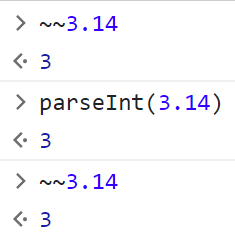

# f-string!!!

In [56]:
# 중괄호가 2개씩 증가할 때마다 출력은 1개씩 증가
value = 'hello'
print(f'{value}')   # 중괄호 x
print(f'{{value}}') # 중괄호 1
print(f'{{{value}}}')   # 중괄호 1
print(f'{{{{value}}}}') # 중괄호 2
print(f'{{{{{value}}}}}') # 중괄호 2
print(f'{{{{{{value}}}}}}') # 중괄호 3

hello
{value}
{hello}
{{value}}
{{hello}}
{{{value}}}


In [58]:
value = 'hello'
print(f'{10 + 10}') # 중괄호 안에서 연산을 하는 것을 강사님은 권하지 않으신다. 코드의 가독성을 해치기때문
# print(f'{value + 'world'}') # error
# print(f'{value + \'world\'}') # 이스케이프 문자를 허용하지 않습니다
print(f'{value + "world"}')
print(f"{value + 'world'}")

helloworld


In [60]:
a = 10
b = 20

# case1
two_numbers_mul = a * b # 굳이 변수 1개를 더 생성할 필요가 있을까?
print(f'{two_numbers_mul}')

# case2
print(f'{a * b}')
# 간단하니까 그렇지
# 코드가 복잡해지면 가독성에서 차이가 납니다

200
200


In [ ]:
a = 10
b = 20

# case1
two_numbers_mul = a * b # 굳이 변수 1개를 더 생성할 필요가 있을까?
two_numbers_add = a + b
two_numbers_mul_add = two_numbers_mul * two_numbers_add
print(f'{two_numbers_mul_add}') # 이 변수명을 보고 의도를 파악할 수 있습니다.

# case2
print(f'{(a * b) * (a + b)}') # 이 값이 무엇을 의미하는지 모릅니다.
# 코드가 복잡해지면 가독성에서 차이가 납니다.

In [48]:
# 포멧팅 지정자는 {변수이름:포멧팅_양식}
num = 3.14159
print(f"{num:.2f}")  # 출력: 3.14

name = "Alice"
print(f"{name:>10}")  # 출력:      Alice  # 포멧팅 지정자 ,format 용법과 동일

3.14
     Alice


In [63]:
# 파이썬(Python) 3 포맷팅 방식
print('나의 이름은 {}입니다'.format('한사람'))
print('나의 이름은 {0}입니다. 나이는 {1}세이고 성별은 {2}입니다.'.format('한사람',33,'남성'))
print('나이는 {1}세이고 성별은 {2}입니다. 나의 이름은 {0}입니다. '.format('한사람',33,'남성'))
print('나이는 {age}세이고 성별은 {gender}입니다. 나의 이름은 {name}입니다. '.format(name='한사람',age=33,gender='남성'))
print('만세삼창 :  {0}!!! {0}!!! {0}!!! '.format('만세'))
print('삼삼칠 박수 :  {0}!!! {0}!!! {1}!!! '.format('짝'*3,'짝'*7))
print('-' * 40)

print('나의 이름은 {0:.2f}입니다'.format(3.141592))
print('나의 이름은 {0:>20}입니다'.format(3.141592)) # 0은 순서 :은 포멧팅 지정자 2f, >20은 포멧팅_양식

나의 이름은 한사람입니다
나의 이름은 한사람입니다. 나이는 33세이고 성별은 남성입니다.
나이는 33세이고 성별은 남성입니다. 나의 이름은 한사람입니다. 
나이는 33세이고 성별은 남성입니다. 나의 이름은 한사람입니다. 
만세삼창 :  만세!!! 만세!!! 만세!!! 
삼삼칠 박수 :  짝짝짝!!! 짝짝짝!!! 짝짝짝짝짝짝짝!!! 
----------------------------------------
나의 이름은 3.14입니다
나의 이름은             3.141592입니다


In [ ]:
# 파이썬(Python) 3.6 f-string 방식
something = '볼펜'
EA = 2
one_length = 5.343
scale = 'cm'

print(f'{something} {EA}개의 길이는 {one_length*EA}{scale} 입니다.')
print(f'{something} {EA}개의 길이는 {one_length*EA:.1f}{scale} 입니다.')

In [70]:
print('Python is [{:15}]'.format('good'))   # 양식같음 자료형만 다름
print('Python is [{:<15}]'.format('good'))
print('Python is [{:>15}]'.format('good'))
print('Python is [{:^15}]'.format('good'))
print('Python is [{:-^15}]'.format('good'))
print('당신의 나이는 [{:15}]세'.format(22)) # 양식같음 자료형만 다름
print('당신의 나이는 [{:<15}]세'.format(22))
print('당신의 나이는 [{:>15}]세'.format(22))
print('당신의 나이는 [{:^15}]세'.format(22))
print('당신의 나이는 [{:-^15}]세'.format(22))
print('-' * 40)

Python is [good           ]
Python is [good           ]
Python is [           good]
Python is [     good      ]
Python is [-----good------]
당신의 나이는 [             22]세
당신의 나이는 [22             ]세
당신의 나이는 [             22]세
당신의 나이는 [      22       ]세
당신의 나이는 [------22-------]세
----------------------------------------


In [68]:
print('[{:15}]'.format('10')) # 양식 같음, 자료형만 다름
print('[{:15}]'.format(10)) # 양식 같음, 자료형만 다름

[10             ]
[             10]


In [72]:
char_a = '5'
int_a = 5
sample = 1234567890

print(1234567890)
print(f'{sample:>5}') # >는 오른쪽정렬
print(f'{char_a:>5}') # >는 오른쪽정렬
print(f'{char_a:<5}') # <는 왼쪽정렬
print(f'{char_a:^5}') # ^는 가운데정렬
print(f'{int_a:0<5}')# <는 왼쪽정렬, 빈자리를 0으로 채울수도 있음
print(f'{int_a:^10.2f}') # ^ 가운데 정렬하면서 float 타입지정

1234567890
1234567890
    5
5    
  5  
50000
   5.00   


In [79]:
int_a = 5
print(f'{int_a:0<5}')# <는 왼쪽정렬, 빈자리를 0으로 채울수도 있음
print(f'{int_a:0>5}')# <는 왼쪽정렬, 빈자리를 0으로 채울수도 있음

'12345'.zfill(10)

50000
00005


'0000012345'

In [ ]:
# 문제1 1~9 까지 더하는 문제
# 문제2 1~9 까지 홀수의 합
# 문제3 1000미만의 자연수에서 3의 배수와 5의 배수의 총합을 구하는 프로그램

문제1

In [82]:
sum = 0
for i in range(1, 10):
    sum += i
print(sum)

45


In [10]:
sum(list(range(10)))  # list로 형변환 하는 것은 데이터가 클수록 부하가 큽니다.
sum([i for i in range(1, 10)])  #  일반 list로 형변환 하는 것보다는 빠르지만 이것도 역시나 부하가 있습니다.
sum(range(1, 10))
((1 + 9) * 9) / 2

45

In [7]:
print(sum(list(range(1, 10))))

45


문제2

In [11]:
sum([i for i in range(1, 10, 2)])
sum(filter(lambda x: x%2==1, range(10)))
sum(range(1, 10, 2))

25

In [84]:
sum = 0
for i in range(1, 10, 2):
    sum += i

print(sum)

25


In [6]:
print(sum(list(range(1, 10, 2))))
print(sum(range(1, 10, 2)))

25


문제3

In [12]:
sum(range(0, 1000, 3)) + sum(range(0, 1000, 5)) - sum(range(0, 1000, 15))
s = 0
for i in range(1000):
    if i % 3 == 0 and i % 5 == 0:
        s += i

s

33165

In [5]:
data = list(range(101))
print(sum(data[::3]) + sum(data[::5]) - sum(data[::15]))

2418


In [ ]:
mylist = []
n = 1
while True:
    if n >= 1000:
        break
    if (n % 3 == 0 or n % 5 == 0) and n not in mylist:
        mylist.append(n)
    n += 1
print(sum(mylist))

In [17]:
# 문제4: 아래 메트릭스를 모두 더해주세요.
m = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
sum(sum(m, []))

# sum([[1, 2, 3], [4, 5, 6], [7, 8, 9]], [])
# [1, 2, 3] + [] == [1, 2, 3]
# [4, 5, 6] + [1, 2, 3] == [4, 5, 6, 1, 2, 3]
# [7, 8, 9] + [4, 5, 6, 1, 2, 3] == [7, 8, 9, 4, 5, 6, 1, 2, 3

45

In [18]:
sum([1, 2, 3], 100)

106

In [19]:
import numpy as np
# 수학 수식에 막강한 성능을 자랑합니다.
# 수학 수식 관련해서 파이썬보다 속도도 훨씬 빠르고 기능도 많습니다

np.sum([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

[1, 2, 3]

In [ ]:
# 문제5
import collections

s = "Hello, World! This is a sample string for testing purposes."
# 방법1
# s = s.replace(',', '').replace('!', '').replace('.', '').replace(' ', '')

# 방법2
# table = str.maketrans(',!.', '   ')
# s = s.translate(table).replace(' ', '')

# 방법3
table = str.maketrans('', '', ',!. ')
s = s.translate(table)

c = collections.Counter(s)
c.most_common

In [24]:
d = {}
s = "Hello, World! This is a sample string for testing purposes."
s = s.replace(',', '').replace('!', '').replace('.', '').replace(' ', '')

# 풀이1, 순회를 돌면서 dict에 있으면 += 1, 없으면 =1 대입하면서 푼다
for i in s:
    if i in d:
        d[i] += 1
    else:
        d[i] = 1
d
# 풀이2, set으로 만들어서 count를 한다.
s = "Hello, World! This is a sample string for testing purposes."
for i in set(s):
    d[i] = s.count(i)

d

{'H': 1,
 'e': 4,
 'l': 4,
 'o': 4,
 'W': 1,
 'r': 4,
 'd': 1,
 'T': 1,
 'h': 1,
 'i': 4,
 's': 7,
 'a': 2,
 'm': 1,
 'p': 3,
 't': 3,
 'n': 2,
 'g': 2,
 'f': 1,
 'u': 1,
 '!': 1,
 '.': 1,
 ' ': 9,
 ',': 1}

In [ ]:
# 문제5: 자주 나오는 알파벳과 알파벳 갯수를 많이 나오는 순서대로 출력하세요.
import collections

s = "Hello, World! This is a sample string for testing purposes."
# 방법1
# s = s.replace(',', '').replace('!', '').replace('.', '').replace(' ', '')

# 방법2
# table = str.maketrans(',!.', '   ')
# s = s.translate(table).replace(' ', '')

# 방법3
table = str.maketrans('', '', ',!. ')
s = s.translate(table)

c = collections.Counter(s)
c.most_common

In [25]:
# 문제6
for i in range(10):
    print('*' * i)


*
**
***
****
*****
******
*******
********
*********


In [26]:
for i in range(10):
    print('*' * (2 * i - 1))


*
***
*****
*******
*********
***********
*************
***************
*****************


In [28]:
for i in range(10):
    print((' ' * (9 - i)) + ('*' * (2 * i - 1)))

         
        *
       ***
      *****
     *******
    *********
   ***********
  *************
 ***************
*****************


In [31]:
for i in range(1, 10):
    print(f"{'*' * ((2 * i) - 1):^}")

         *          
        ***         
       *****        
      *******       
     *********      
    ***********     
   *************    
  ***************   
 *****************  


In [ ]:
# 다음 자료구조 클래스를 만들어주세요.
# 데이터는 <1, 2, 3, 4> 형식으로 숫자만 저장됩니다.
# print()를 하면 <1, 2, 3, 4>와 같이 출력이 되어야합니다.
# 메서드는 append, remove가 있습니다.
# 아래 연산은 길이가 다르면 error가 납니다
# <1, 2, 3, 4> + <1, 2, 3, 4> == <2, 4 , 6, 8>과 같이 같은 순서에 요소를 더합니다.
# <1, 2, 3, 4> - <1, 2, 3, 4> == <2, 4 , 6, 8>과 같이 같은 순서에 요소를 뺍니다.
# <1, 2, 3, 4> * 3 == <3, 6, 9, 12>
# 나누기는 지원하지 않습니다.

In [31]:
class OperList:
    def __init__(self, *args):
        self.__operlist = list(args)

    def __str__(self):
        return f'<{str(self.__operlist)[1:-1]}>'

    def __repr__(self):
        return  f'<{str(self.__operlist)[1:-1]}>'

    def append(self, num):
        self.__operlist.append(num)

    def remove(self, num):
        self.__operlist.remove(num)

    def __len__(self):
        return self.__operlist.__len__()

    def __add__(self, other):
        if len(self.__operlist) != len(other.__operlist):
            raise
        for i in range(len(self.__operlist)):
            self.__operlist[i] += other.__operlist[i]
        return f'<{str(self.__operlist)[1:-1]}>'

    def __sub__(self, other):
        if len(self.__operlist) != len(other.__operlist):
            raise
        for i in range(len(self.__operlist)):
            self.__operlist[i] -= other.__operlist[i]
        return f'<{str(self.__operlist)[1:-1]}>'

    def __mul__(self, other):
        if not isinstance(other, int):
            raise
        for i in range(len(self.__operlist)):
            self.__operlist[i] *= other
        return f'<{str(self.__operlist)[1:-1]}>'



l = OperList(1, 2, 3, 4)
ll = OperList(1, 2, 3, 4)

print(l)
l.append(5)
print(l)
l.remove(5)
print(l)
print(l + l)  # 출력: <2, 4, 6, 8>
print(l - ll) # 출력: <1, 2, 3, 4>
print(l * 3)  # 출력: <3, 6, 9, 12>

<1, 2, 3, 4>
<1, 2, 3, 4, 5>
<1, 2, 3, 4>
<2, 4, 6, 8>
<1, 2, 3, 4>
<3, 6, 9, 12>


In [8]:
class OperList:
    def __init__(self, *n):
        self.data = list(n)

    def append(self, n):
        self.data,append(n)




l = OperList(1, 2, 3)
l.append(5)
# print(l + l)  # 출력: <2, 4, 6, 8, 10>

RecursionError: ignored

In [4]:
과제2:
student.csv에는 아래와 같은 텍스트가 담겨있습니다.
'''
학년,반,번,이름,국어,영어,수학,사회
3,3,1,licat,90,80,30,40
3,3,2,mura,80,70,60,30
3,3,3,binky,30,80,70,30
'''
학생들의 평균을 구해 아래와 같이 student.csv출력되게 해주세요.(xx이라 표기된 곳에 평균 값이 들어가야 합니다.)
'''
학년,반,번,이름,국어,영어,수학,사회,평균
3,3,1,licat,90,80,30,40,xx
3,3,2,mura,80,70,60,30,xx
3,3,3,binky,30,80,70,30,xx
'''

[1, 2, 3]

In [4]:
f = open('student.csv', 'w')
s = '''학년,반,번,이름,국어,영어,수학,사회
3,3,1,licat,90,80,30,40
3,3,2,mura,80,70,60,30
3,3,3,binky,30,80,70,30'''

f.write(s)
f.close()


학년,반,번,이름,국어,영어,수학,사회
3,3,1,licat,90,80,30,40
3,3,2,mura,80,70,60,30
3,3,3,binky,30,80,70,30

In [ ]:
f = open('student.csv', 'r')
lines = f.readlines()
for line in lines:
	print(line, end='')

f.close()

In [7]:
info = lines[0][0:-1].split(',')
licat_record = lines[1][12:-1].split(',')
mura_record = lines[2][12:-1].split(',')
binky_record = lines[3][12:].split(',')

def avg(name):
    sum = 0
    for i in range(len(name)):
        sum += int(name[i])
    return sum/len(name)

licat_avg = avg(licat_record)
mura_avg = avg(mura_record)
binky_avg = avg(binky_record)
info += ['평균']
licat_info = lines[1][0:-1].split(',') + [f'{licat_avg}']
mura_info = lines[2][0:-1].split(',') + [f'{mura_avg}']
binky_info = lines[3][0:].split(',') + [f'{binky_avg}']

f = open('student.csv', 'w')

str1 = ','.join(info)
str2 = ','.join(licat_info)
str3 = ','.join(mura_info)
str4 = ','.join(binky_info)

f.write(str1)
f.write('\n')
f.write(str2)
f.write('\n')
f.write(str3)
f.write('\n')
f.write(str4)
f.close()

In [101]:
test = [1, 2, 3, 4]
sum = 0
for i in range(len(test)):
    sum += test[i]

sum

10

In [2]:
# 편해선님 코딩
# 과제2
with open('student.csv', 'r') as f:
    students = []
    lines = f.readlines()
    for line in lines:
        if line[-1] == '\n':
            line = line[:-1]
        student = line.split(',')
        students.append(student)

students[0].append('평균')
for student in students[1:]:
    score = list(map(int, student[4:]))
    avg = sum(score)/len(score)
    student.append(avg)

import csv
with open('student.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(students)

In [ ]:
# 이호준강사님 코드
s = ''
with open('student.csv', 'r') as f:
    lines = f.readlines()
    s += lines[0][:-1] + ',평균'
    for i in lines[1:]:
        data = i.split(',')
        s += f'\n{i.strip()},{sum(map(int, data[4:])) / 4}'

with open('student.csv', 'w') as f:
    f.write(s)